# M2608.001300 Machine Learning <br> Assignment #1-2 Perceptron and Logistic Regression 

Copyright (C) Data Science and Artificial Intelligence Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. Written by Seil Lee, March 2018

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **all parts**, run the *CollectSubmission.sh* script with your **student_id** as input argument. <br>
This will produce a zipped file called *[student_id].zip*. Please submit this file on ETL. &nbsp;&nbsp; (Usage: ./*CollectSubmission.sh* &nbsp; student_id)


---
### <font color=blue>[Problem #2]</font> (40+30 points)

**Write your own code below so that the results is like the following example.**  
1) Complete the following class definition.  
2) You can write your code only within the marked with comments.
## 1. Perceptron Design

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import urllib, os, tarfile
from data_utils import load_CIFAR10
from sklearn import linear_model
%matplotlib inline


# ↓ Class Definition ↓
class Perceptron :
    def __init__(self, data, learningRate=1, iteration=1) :
        self.data = data
        if data=='Iris' :
            self.loadIrisData()
        elif data=='CIFAR-10' :
            self.loadCIFAR10Data()
        else :
            self.loadTrainData(data)
        self.setEnv(learningRate, iteration)
        
    def loadTrainData(self, data):
        filename = data
        print('loadTrainData(): Not used')
        # Do Not Use
    
    def loadCIFAR10Data(self):
        # Download CIFAR-10 file through the internet
        url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
        filename = 'cifar-10-python.tar.gz'
        cifar10_dir = 'cifar-10-batches-py'
        if os.path.isdir(cifar10_dir):
            pass
        elif os.path.isfile(filename) :
            tar = tarfile.open(filename, 'r:gz')
            print('CIFAR-10:Extracting...',end='')
            tar.extractall()
            print('Done')
            tar.close()
        else : 
            print('CIFAR-10:Downloading...',end='')
            urllib.request.urlretrieve(url, filename)
            print('Done')
            print('CIFAR-10:Extracting...',end='')
            tar = tarfile.open(filename, 'r:gz')
            tar.extractall()
            print('Done')
            tar.close()
        print('CIFAR-10:Loading...',end='')
        X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        catIdxs = np.flatnonzero(y_train == 3) # flatnonzero - returns indices of nonzero elements
        dogIdxs = np.flatnonzero(y_train == 5)
        self.trainDataX = np.zeros((len(catIdxs)+len(catIdxs),32*32*3))
        self.trainDataY = np.zeros(len(self.trainDataX)) # len - returns axis 0 range
        for i in range(5000) :
            self.trainDataX[i*2] = np.ravel(X_train[catIdxs[i]])
            self.trainDataY[i*2] = 1
            self.trainDataX[i*2+1] = np.ravel(X_train[dogIdxs[i]])
            self.trainDataY[i*2+1] = -1
        """
        ↑↑↑
        You can write your code for preprocessing here.
        ↓↓↓
        """
        
        self.resetWeights()
        print('Done')
    
    def loadIrisData(self):
        print('Iris:Loading...',end='')
        self.trainDataX = np.load('iris.data.npy')
        self.trainDataY = np.load('iris.label.npy')
        self.trainDataY = np.array([ 1 if one ==0 else -1 for one in self.trainDataY ])
        """
        ↑↑↑
        You can write your code for preprocessing here.
        ↓↓↓
        """
        self.resetWeights()
        print('Done')

    def setEnv(self, learningRate, iteration):
        self.learningRate = learningRate
        self.iteration = iteration
    
    def getTrainData(self):
        return self.trainDataX
    
    def getTrainLabel(self):
        return self.trainDataY
    
    def getWeights(self):
        return self.weights
    
    def resetWeights(self):
        self.weights = np.zeros((1, self.trainDataX.shape[1]))
    
    def activate(self, sig):
        """
        ↑↑↑
        You can write your code for activation here.
        ↓↓↓
        """
        return 1./(1 + np.exp(-sig))

    def sigOut(self,inputX):
        return np.dot(self.weights, inputX)
    
    def gradient(self, inputX, labelY):
        """
        ↑↑↑
        You can write your code for gradient here.
        ↓↓↓
        """
        sumList = [labelY[i]*inputX[i]/(1 + np.exp(labelY[i]*self.sigOut(inputX[i]))) for i in range(len(inputX))]
        return -1./len(inputX)*sum(sumList)
    
    def gradientDescent(self):
        print('Learning...', end='')
        for i in range(self.iteration):
            print(i+1, end='. ')
            grad = self.gradient(self.trainDataX, self.trainDataY)
            self.weights = self.weights - self.learningRate*grad
            print('gradient', np.linalg.norm(grad))

    def learnTutorial(self):
        print('Learning...', end='')
        lrModel = linear_model.LogisticRegression(fit_intercept=False, C=1e4, max_iter=self.iteration)
        lrModel.fit(self.trainDataX, self.trainDataY)
        self.weights = lrModel.coef_
        print('Done')
        
    def learn(self):
        print('Learning...', end='')
        for i in range(self.iteration):
            print(i+1, end='. ')
            """
            ↑↑↑
            You can write your code for training here.
            ↓↓↓
            """
            criteria = np.array([self.sigOut(one) for one in self.trainDataX]).reshape(-1)*self.trainDataY
            for j in range(len(criteria)):
                if criteria[j] <= 0:
                    self.weights = self.weights + self.learningRate*self.trainDataY[j]*self.trainDataX[j]
                    break
            print('gradient', np.linalg.norm(self.gradient(self.trainDataX, self.trainDataY)))
         
        print('Done')
    
    def getPredictedLabel(self, testData):
        actSig = [self.activate(self.sigOut(one)) for one in testData]
        predictedLabel = [1 if one >= 0.5 else -1 for one in actSig]
        return np.array(predictedLabel)
# ↑ Class Definition ↑
            
# ↓ Function Definition ↓
def showCIFARImg(data, label, samples=5) :
    classes = ['cat', 'dog']
    num_classes = len(classes)
    sub_idx = 0
    plt.figure(figsize = (8,6))
    for y, cls in zip([1,-1], classes):
        idxs = np.flatnonzero(label == y)
        idxs = np.random.choice(idxs, samples, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + sub_idx + 1
            plt.subplot(samples, num_classes, plt_idx)
            plt.imshow(data[idx].reshape((32,32,3)).astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
        sub_idx += 1
    plt.show()
# ↑ Function Definition ↑

## 2. Results for IRIS Data
- Tutorial with the **scikit-learn** package
- %time command measure the dwell time of the following sentence

Iris:Loading...Done


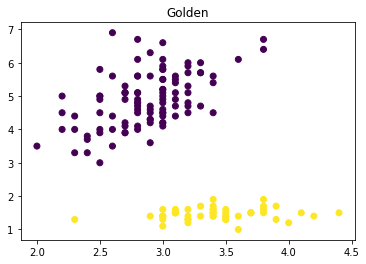

Learning...Done
CPU times: user 1.76 ms, sys: 139 µs, total: 1.89 ms
Wall time: 564 µs
Accuracy:  1.0


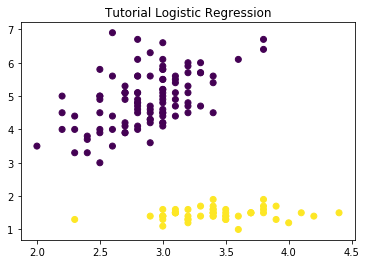

In [216]:
node_Iris = Perceptron(data='Iris',iteration=3)
plt.scatter(node_Iris.getTrainData()[:,1], node_Iris.getTrainData()[:,2], c=node_Iris.getTrainLabel())
plt.title('Golden')
plt.show()

%time node_Iris.learnTutorial()
pl = node_Iris.getPredictedLabel(node_Iris.getTrainData())
acc = sum(pl==node_Iris.getTrainLabel())
print('Accuracy: ', acc/len(pl))
plt.scatter(node_Iris.getTrainData()[:,1], node_Iris.getTrainData()[:,2], c=pl)
plt.title('Tutorial Logistic Regression')
plt.show()

- Your design  
#### <font color=blue>[Problem #2-1]</font> (40 points)
You must win 1.0 accuracy.


Learning...1. gradient 5.747998298924979
2. gradient 2.0802093573982057
3. gradient 5.747998240285994
4. gradient 2.080213450561276
5. gradient 0.030828903118938124
Done
CPU times: user 11.8 ms, sys: 299 µs, total: 12.1 ms
Wall time: 10.8 ms
Accuracy:  1.0


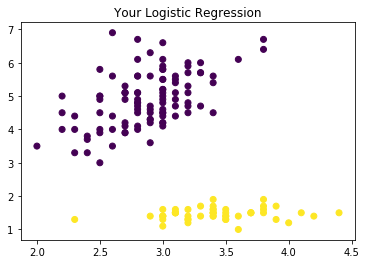

In [217]:
node_Iris.resetWeights()
node_Iris.setEnv(learningRate=1, iteration=5)
%time node_Iris.learn()

pl = node_Iris.getPredictedLabel(node_Iris.getTrainData())
acc = sum(pl==node_Iris.getTrainLabel())
print('Accuracy: ', acc/len(pl))
plt.scatter(node_Iris.getTrainData()[:,1], node_Iris.getTrainData()[:,2], c=pl)
plt.title('Your Logistic Regression')
plt.show()

## 3. Results for CIFAR-10 Data

CIFAR-10:Loading...Done


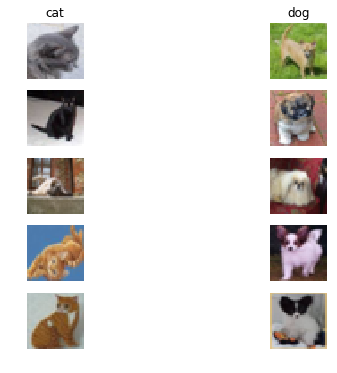

In [223]:
node_CIFAR = Perceptron(data='CIFAR-10',learningRate=0.1, iteration=3)

data4Img = node_CIFAR.getTrainData()
showCIFARImg(data4Img, node_CIFAR.getTrainLabel())

- Tutorial with the **scikit-learn** package

Learning...Done
CPU times: user 2.93 s, sys: 124 ms, total: 3.05 s
Wall time: 3.05 s
Accuracy:  0.6589


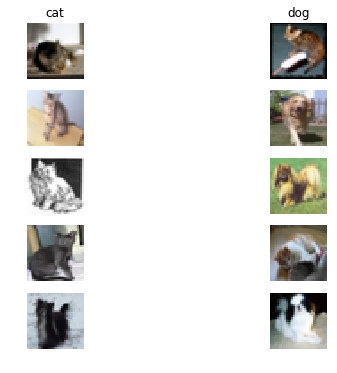

In [224]:
%time node_CIFAR.learnTutorial()

pl = node_CIFAR.getPredictedLabel(node_CIFAR.getTrainData())
acc = sum(pl==node_CIFAR.getTrainLabel())
print('Accuracy: ', acc/len(pl))
showCIFARImg(data4Img, pl)

- Your design
#### <font color=blue>[Problem #2-2]</font> (30 points)  
1) You must win the accuracy more than 0.5.  
2) The better accuracy, the more points

Learning...1. 

/home/jgkim-icsl/anaconda3/envs/ML_CLASS/lib/python3.6/site-packages/ipykernel/__main__.py:113: RuntimeWarning: overflow encountered in exp


gradient 3269.3870279983344
2. gradient 415.1486860124727
3. gradient 3269.3870279983344
4. gradient 3224.98322922071
5. gradient 3231.551629980242
6. gradient 3076.1058617617955
7. gradient 3269.019127833215
8. gradient 997.9392281385072
9. gradient 3269.3870279983344
10. gradient 3108.5272664329987
11. gradient 3230.4298807029895
12. gradient 1345.3219322728628
13. gradient 3231.551629980242
14. gradient 3093.7692054219815
15. gradient 2858.121562765328
16. gradient 3215.217662553848
17. gradient 1565.3255392154358
18. gradient 3266.6864658643103
19. gradient 2512.932013793587
20. gradient 3222.2339485109037
21. gradient 560.3550193389733
22. gradient 3260.8713506857903
23. gradient 2309.752931217637
24. gradient 3169.183566212975
25. gradient 3114.409137238265
26. gradient 2514.887962853944
27. gradient 3209.269487107551
28. gradient 1591.2125338059138
29. gradient 3229.877443783673
30. gradient 2365.9054871225644
31. gradient 3129.8993031123005
32. gradient 3065.6337483632456
33. g

258. gradient 2352.9950611677023
259. gradient 804.6491050683552
260. gradient 3000.291504235424
261. gradient 368.0373587134464
262. gradient 3028.3872355563662
263. gradient 1625.9238575886175
264. gradient 2306.330108522135
265. gradient 846.1206139868298
266. gradient 2819.676455762899
267. gradient 1849.3125751186442
268. gradient 2699.7757422999825
269. gradient 972.6171206483464
270. gradient 2039.8696786266619
271. gradient 1762.0146900838047
272. gradient 2373.6779213722234
273. gradient 701.9500252867062
274. gradient 2922.0665177227675
275. gradient 1127.57144851096
276. gradient 2763.023189363394
277. gradient 862.6835046329902
278. gradient 2870.866841761239
279. gradient 284.6140166930152
280. gradient 3024.5130997938168
281. gradient 1698.2184236193175
282. gradient 2724.5399119764097
283. gradient 821.4784496867211
284. gradient 2952.383659646234
285. gradient 554.1677131976321
286. gradient 3152.6569059802246
287. gradient 1663.0462589109582
288. gradient 2710.11911431

510. gradient 1931.9132269828579
511. gradient 952.2619245705826
512. gradient 2914.1609759981434
513. gradient 1156.225674351426
514. gradient 2082.3055449352096
515. gradient 1644.6929706867795
516. gradient 1030.262977980703
517. gradient 2215.206601581616
518. gradient 899.9492992155383
519. gradient 2944.7564184615794
520. gradient 1285.221205430672
521. gradient 1996.116322430216
522. gradient 1648.5314672286545
523. gradient 1665.9269834404677
524. gradient 2113.292663695455
525. gradient 643.0972242391089
526. gradient 2465.7727198508364
527. gradient 324.0652927629597
528. gradient 2620.8973661998375
529. gradient 265.0618205547718
530. gradient 2811.9476259034986
531. gradient 1043.9657190575942
532. gradient 2079.8308841350226
533. gradient 1545.0412217344142
534. gradient 1514.3774059481377
535. gradient 2195.3432537055905
536. gradient 518.5877525147779
537. gradient 2534.59619167522
538. gradient 259.0037324172955
539. gradient 2756.812495979329
540. gradient 989.64713823

763. gradient 1476.121666712524
764. gradient 1959.3275988096018
765. gradient 384.61631949144015
766. gradient 3042.431900986626
767. gradient 2119.1067698128827
768. gradient 375.21446726435
769. gradient 2097.7352498734253
770. gradient 1148.6635902260157
771. gradient 1908.4601980853454
772. gradient 1549.7331620307766
773. gradient 1391.8917477878279
774. gradient 1774.95380243201
775. gradient 1346.966620374878
776. gradient 2666.408602201171
777. gradient 542.2363457738518
778. gradient 1575.6347659276753
779. gradient 1845.9823099069488
780. gradient 1240.9803621511142
781. gradient 1889.829233660392
782. gradient 1166.5638778613454
783. gradient 2889.479038681134
784. gradient 1558.7587555078017
785. gradient 1511.6453868073227
786. gradient 1887.7718603060223
787. gradient 1672.6038728001292
788. gradient 1477.8087602058565
789. gradient 622.1684884273471
790. gradient 1821.0105891261935
791. gradient 1290.3912528837136
792. gradient 1871.3797001345156
793. gradient 747.43147

/home/jgkim-icsl/anaconda3/envs/ML_CLASS/lib/python3.6/site-packages/ipykernel/__main__.py:102: RuntimeWarning: overflow encountered in exp


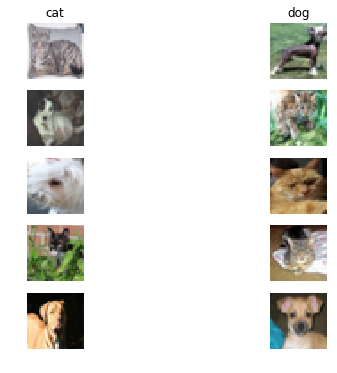

In [221]:
node_CIFAR.resetWeights()
node_CIFAR.setEnv(learningRate=0.01, iteration=1000)
%time node_CIFAR.learn()

pl = node_CIFAR.getPredictedLabel(node_CIFAR.getTrainData())
acc = sum(pl==node_CIFAR.getTrainLabel())
print('Accuracy: ', acc/len(pl))
showCIFARImg(data4Img, pl)

Learning...1. gradient 101.32685641985545
2. 

/home/jgkim-icsl/anaconda3/envs/ML_CLASS/lib/python3.6/site-packages/ipykernel/__main__.py:113: RuntimeWarning: overflow encountered in exp


gradient 2364.19588184641
3. gradient 3269.3870279983344
4. gradient 3231.551629980242
5. gradient 3269.3870279983344
6. gradient 3231.551629980242
7. gradient 3269.3870279983344
8. gradient 3231.551629980242
9. gradient 3269.3870279983344
10. gradient 3231.551629980242
11. gradient 3269.3870279983344
12. gradient 3231.551629980242
13. gradient 3269.3870279983344
14. gradient 3231.551629980242
15. gradient 3269.3870279983344
16. gradient 3231.551629980242
17. gradient 3269.3870279983344
18. gradient 3231.551629980242
19. gradient 3269.3870279983344
20. gradient 3231.551629980242
21. gradient 3269.3870279983344
22. gradient 3230.5082527910595
23. gradient 3269.3870279983344
24. gradient 3227.8610406294697
25. gradient 3269.125797074593
26. gradient 3226.9061213121436
27. gradient 3268.423743008497
28. gradient 3226.565736134594
29. gradient 3266.4711767360113
30. gradient 3224.4326273869606
31. gradient 3262.901431124618
32. gradient 3222.229895688943
33. gradient 3256.2160078627417
34.

258. gradient 2987.1603220338598
259. gradient 2986.3638697493307
260. gradient 2985.943469644195
261. gradient 2986.0846562216666
262. gradient 2986.695910288604
263. gradient 2986.3638697493307
264. gradient 2985.3600189598556
265. gradient 2985.4114263553306
266. gradient 2985.9403968376346
267. gradient 2985.7992439011136
268. gradient 2986.4861771401906
269. gradient 2985.3921289646655
270. gradient 2985.0882739517956
271. gradient 2985.3921289646655
272. gradient 2987.365196511116
273. gradient 2985.3758243302987
274. gradient 2983.549388423676
275. gradient 2984.010449782499
276. gradient 2984.719531965322
277. gradient 2984.306395105427
278. gradient 2983.9203186435043
279. gradient 2985.0075029350746
280. gradient 2984.2758758611817
281. gradient 2984.4590738800757
282. gradient 2984.2758758611817
283. gradient 2984.6802904740166
284. gradient 2984.2758758611817
285. gradient 2984.7246049921496
286. gradient 2984.569871798269
287. gradient 2985.145704727037
288. gradient 2984.

510. gradient 2943.0336378666493
511. gradient 2942.932021746848
512. gradient 2943.0336378666493
513. gradient 2943.6121587654684
514. gradient 2943.0336378666493
515. gradient 2942.3634843981513
516. gradient 2943.0336378666493
517. gradient 2943.6296853651666
518. gradient 2944.037550107475
519. gradient 2942.936782903617
520. gradient 2942.2430309929364
521. gradient 2942.2429055349
522. gradient 2943.246931925268
523. gradient 2943.3432029683886
524. gradient 2942.5799030738044
525. gradient 2940.8523044137924
526. gradient 2940.8429345112954
527. gradient 2939.0061633793644
528. gradient 2939.7340257829096
529. gradient 2938.5763991817093
530. gradient 2939.7340257829096
531. gradient 2939.619411337471
532. gradient 2939.7340257829096
533. gradient 2939.619411337471
534. gradient 2939.0754497851867
535. gradient 2938.9255219844413
536. gradient 2939.8937825087664
537. gradient 2941.395846890087
538. gradient 2941.2322289982985
539. gradient 2940.770020016889
540. gradient 2941.65

763. gradient 2914.9388596069116
764. gradient 2916.212269055744
765. gradient 2916.3126909625794
766. gradient 2915.3812910817173
767. gradient 2914.762710080305
768. gradient 2914.1118441520875
769. gradient 2914.762710080305
770. gradient 2914.79623523436
771. gradient 2914.7168251795747
772. gradient 2914.79623523436
773. gradient 2914.7168251795747
774. gradient 2914.79623523436
775. gradient 2914.220785144532
776. gradient 2914.79623523436
777. gradient 2914.9201230189874
778. gradient 2915.5391410108464
779. gradient 2914.9201230189874
780. gradient 2915.5391410108464
781. gradient 2914.9201230189874
782. gradient 2913.637595324485
783. gradient 2913.8208873406174
784. gradient 2914.380492836502
785. gradient 2914.1220218057224
786. gradient 2914.380492836502
787. gradient 2913.8208873406174
788. gradient 2914.083679031002
789. gradient 2913.1903878194935
790. gradient 2912.923821770281
791. gradient 2912.0771909462596
792. gradient 2911.6145987185055
793. gradient 2911.84233268

/home/jgkim-icsl/anaconda3/envs/ML_CLASS/lib/python3.6/site-packages/ipykernel/__main__.py:102: RuntimeWarning: overflow encountered in exp


Accuracy:  0.5325


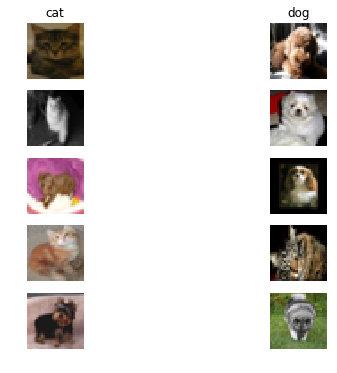

In [227]:
node_CIFAR.resetWeights()
node_CIFAR.setEnv(learningRate=1, iteration=1000)
%time node_CIFAR.gradientDescent()

pl = node_CIFAR.getPredictedLabel(node_CIFAR.getTrainData())
acc = sum(pl==node_CIFAR.getTrainLabel())
print('Accuracy: ', acc/len(pl))
showCIFARImg(data4Img, pl)